# Import libraries

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [2]:
PATH = "data/nyc-taxi/"

# Load data

In [16]:
%%time
train_df = pd.read_feather('tmp/taxi-train-v8-Baseline')

Wall time: 1.61 s


In [17]:
test_df = pd.read_feather('tmp/taxi-test-v8-Baseline')

In [18]:
train_df.shape, test_df.shape

((54046017, 15), (9914, 14))

In [19]:
train_df.year = (train_df.year+2000).astype('uint16')
test_df.year = (test_df.year+2000).astype('uint16')

# Check test data pickup and drop off points

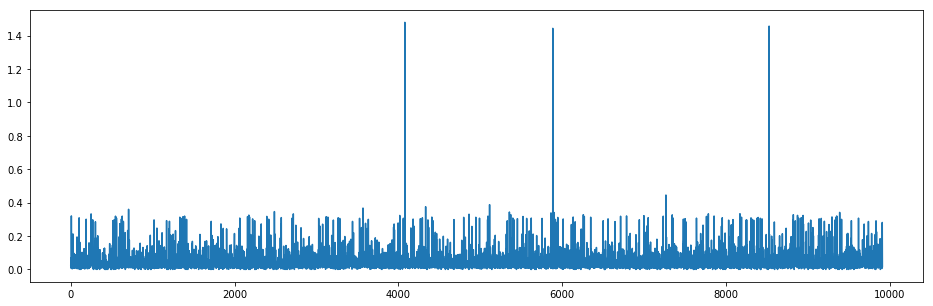

In [20]:
test_df.simple_distance.plot(figsize=(16,5))

In [21]:
test_df.simple_distance.nlargest(10)

4080    1.479969
8529    1.457348
5887    1.444138
7269    0.445850
5115    0.388084
4334    0.375759
3569    0.367771
706     0.360268
2487    0.346664
5357    0.344002
Name: simple_distance, dtype: float32

In [24]:
top4 = test_df.simple_distance.nlargest(4).index

In [25]:
test_df_drop_4 = test_df.drop(top4)

In [26]:
test_df_drop_4.simple_distance.nlargest()

5115    0.388084
4334    0.375759
3569    0.367771
706     0.360268
2487    0.346664
Name: simple_distance, dtype: float32

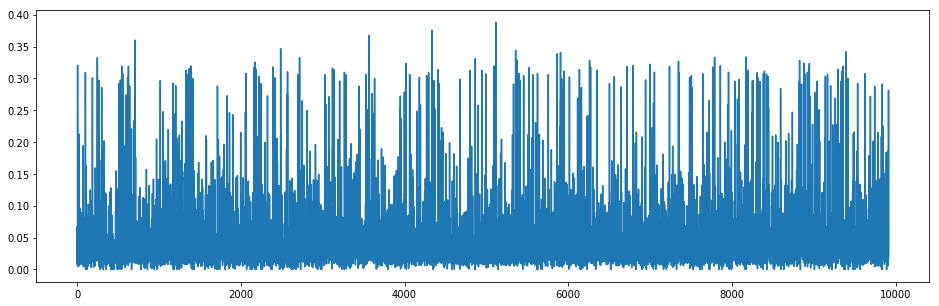

In [27]:
test_df_drop_4.simple_distance.plot(figsize=(16,5))

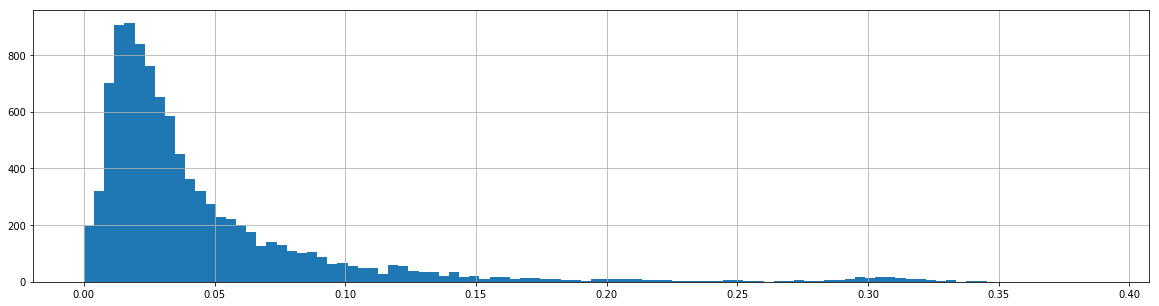

In [31]:
test_df_drop_4.simple_distance.hist(bins=100, figsize=(20,5))

In [32]:
def get_gps_by_index(df,idx):
    print((df.iloc[idx]['pickup_latitude'], df.iloc[idx]['pickup_longitude']
           df.iloc[idx]['dropoff_latitude'], df.iloc[idx]['dropoff_longitude']))

In [33]:
get_gps_by_index(test_df,4080)

(41.36614, -73.13739, 40.732925, -73.984146)


In [52]:
test_df.simple_distance.iloc[4080], test_df.straight_distance.iloc[4080]

(1.479969, 1.0573337)

Long way: 93+90 = 180   Direct: 122km

In [97]:
get_gps_by_index(test_df,7269)

(40.77585, -73.97994, 40.722706, -73.587234)


In [98]:
test_df.simple_distance.iloc[7269], test_df.straight_distance.iloc[7269]

(0.44585037, 0.39628723)

In [99]:
test_df.simple_distance.iloc[7269]*120, test_df.straight_distance.iloc[7269]*120

(53.502044677734375, 47.55446791648865)

# Check Training Data

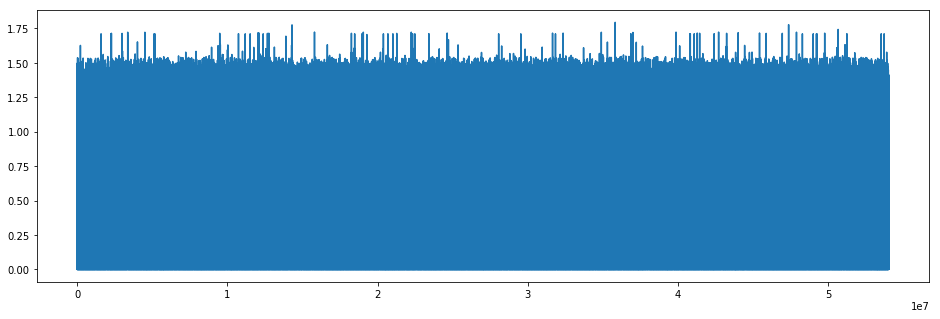

In [34]:
train_df.simple_distance.plot(figsize=(16,5))

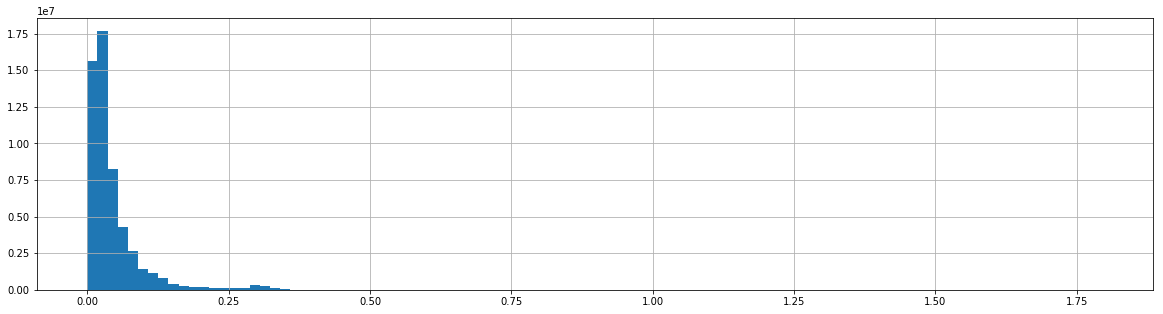

In [35]:
train_df.simple_distance.hist(bins=100, figsize=(20,5))

In [38]:
train_df_drop = train_df[train_df.simple_distance<0.4]

In [41]:
len(train_df[train_df.simple_distance>=0.4])

16473

In [39]:
len(train_df_drop)

54029544

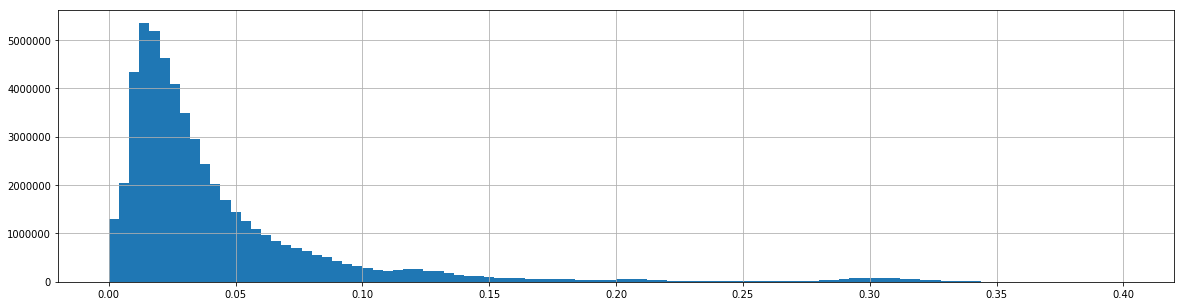

In [40]:
train_df_drop.simple_distance.hist(bins=100, figsize=(20,5))